<a href="https://colab.research.google.com/github/asrianda/latAlgoritma/blob/main/Algo_A5_Lat3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('titanic_data.csv')

<ipython-input-19-a00f8184b5ee>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['age'].fillna(df_selected['age'].median(), inplace=True)
<ipython-input-19-a00f8184b5ee>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

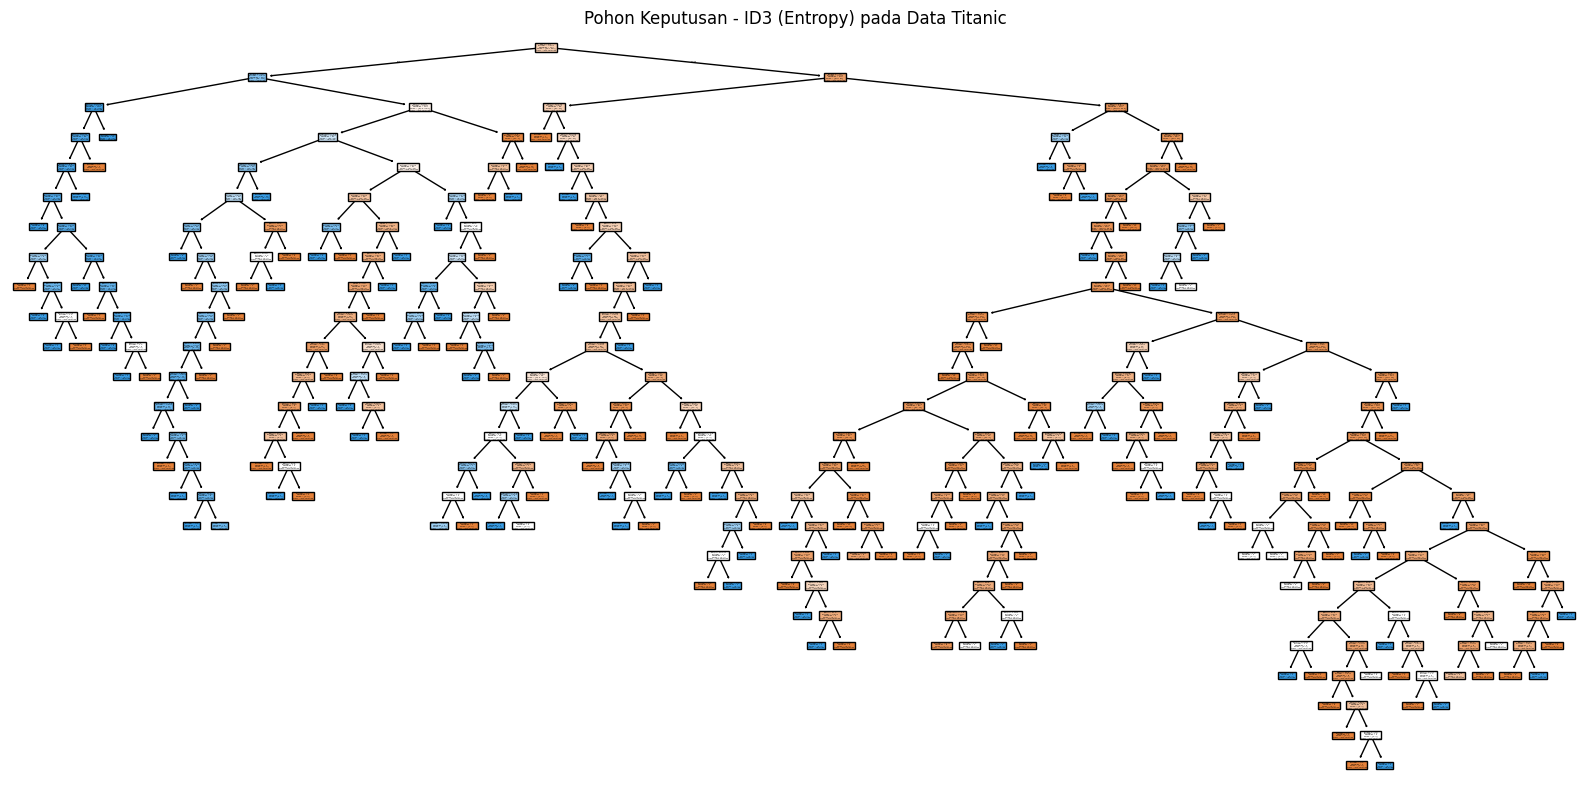

In [19]:
# 1. Pilih fitur yang akan digunakan
df_selected = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].copy()

# 2. Tangani missing value
df_selected['age'].fillna(df_selected['age'].median(), inplace=True)
df_selected['embarked'].fillna(df_selected['embarked'].mode()[0], inplace=True)

# 3. Encode kolom kategorikal
encoder = OrdinalEncoder()
df_selected[['sex', 'embarked']] = encoder.fit_transform(df_selected[['sex', 'embarked']])

# 4. Pisahkan fitur dan target
X = df_selected.drop('survived', axis=1)
y = df_selected['survived']

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model ID3
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# 7. Prediksi dan laporan klasifikasi
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=["Not Survived", "Survived"])
accuracy = accuracy_score(y_test, y_pred)

# 8. Visualisasi pohon keputusan
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Pohon Keputusan - ID3 (Entropy) pada Data Titanic")
plt.tight_layout()
plt.show()


In [17]:
print("Akurasi Model: {:.2f}".format(accuracy))
print("\nLaporan Klasifikasi:\n")
print(report)

Akurasi Model: 0.84

Laporan Klasifikasi:

              precision    recall  f1-score   support

Not Survived       0.84      0.88      0.86       103
    Survived       0.83      0.77      0.80        75

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178

